Library Setup

In [13]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

Import Data

In [14]:
url="https://api.covidtracking.com/v1/states/ny/daily.csv" # API Call for NY data
s=requests.get(url).content


Data Transformation

In [15]:
df = pd.read_csv(io.StringIO(s.decode('utf-8'))) # Put inside data frame container

df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d') # Format dates

df.drop(['dateChecked'],axis=1,inplace=True) # Exclude unnecessary attributes

df.fillna(value=-1, inplace=True) # Impute NaN values

View Data

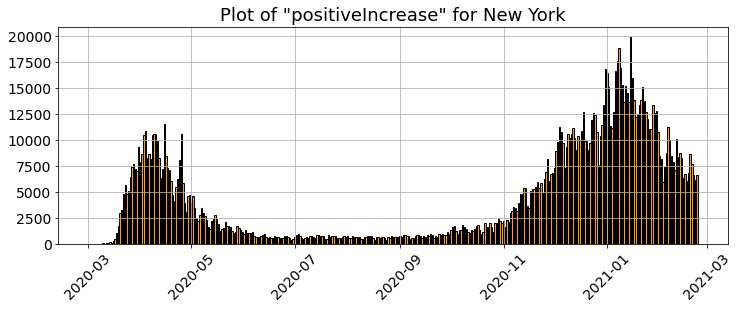

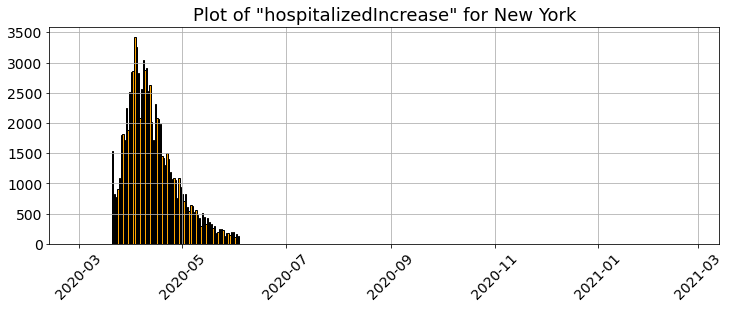

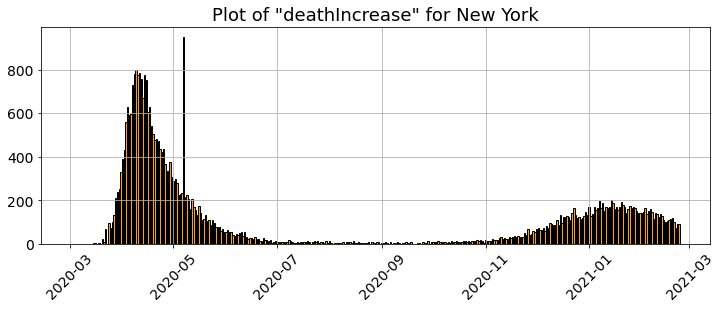

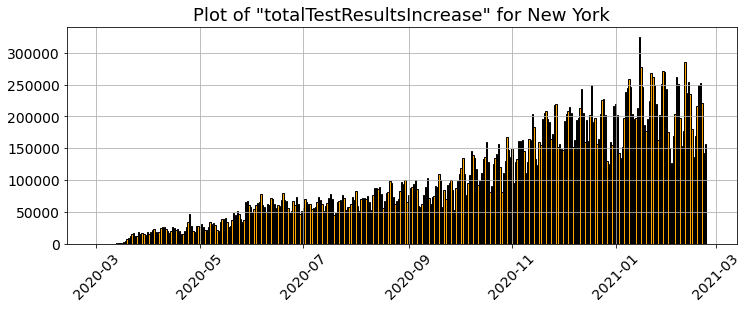

In [16]:
def plot_var(var='positiveIncrease'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"

    y = df[var]
    x = df['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for New York".format(var),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

plot_var('positiveIncrease')

plot_var('hospitalizedIncrease')

plot_var('deathIncrease')

plot_var('totalTestResultsIncrease')